In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import sys
import os

REPO_NAME = 'sewer-nfl'
CWD = str(os.getcwd())
REPO_DIR = CWD[:CWD.find(REPO_NAME)+len(REPO_NAME)]
sys.path.insert(0,REPO_DIR)

In [8]:
from models._utilities.data.pipe_layer import build_training_dataset

REGEN = True
if REGEN:
    from warehouse.config import Configuration # At model level, swictch this to model's config
    config = Configuration()
    t = build_training_dataset(config)
else: t = build_training_dataset()

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.
Index(['season', 'week', 'team', 'total_off_epa_sum', 'team_HHI'], dtype='object')


c:\Users\zacha\Documents\GitHub\sewer-nfl\models\_utilities\data\pipe_layer.py:76: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  res['missing_N'] = res.isnull().sum(axis=1) / len(res.columns)


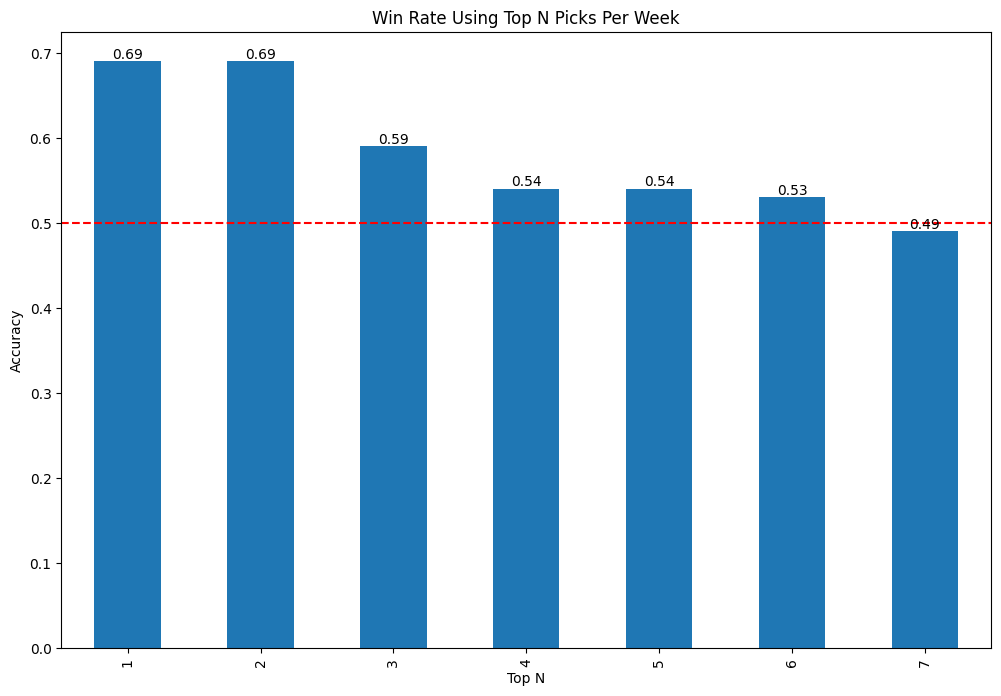

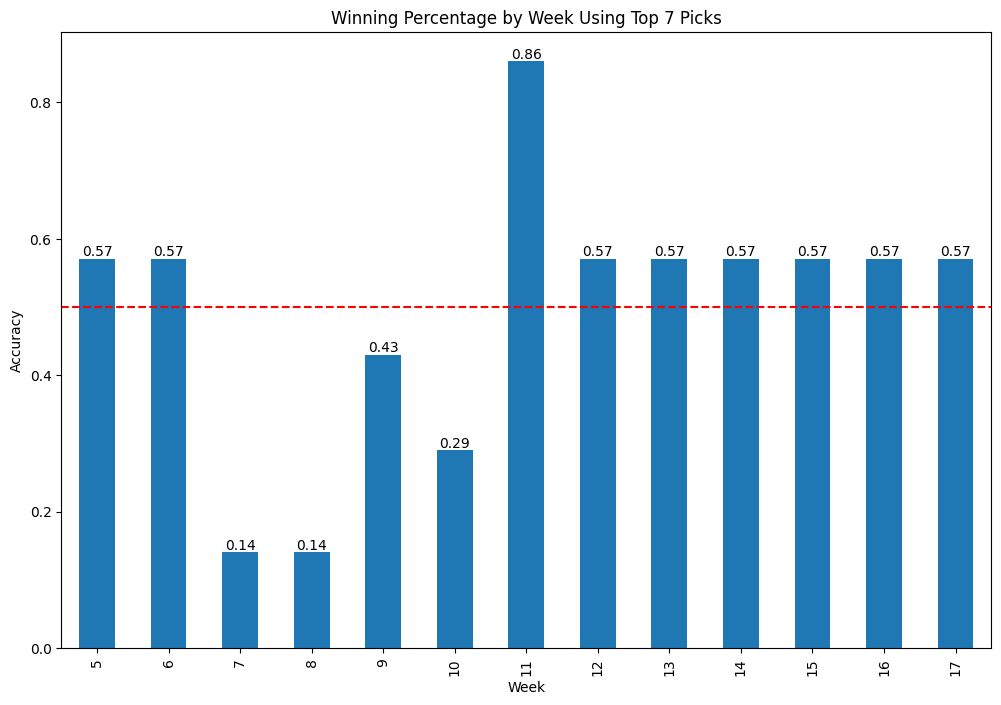

In [9]:
from models._utilities.model.sewer_boost import Model
m1 = Model(
    training_data = t
)
m1.get_test_accuracy_drop_off(top_N_range=range(1,8))
m1.get_test_accuracy_by_week(most_confident=7)

In [10]:
from warehouse.catalog import build_catalog
FUNCTION_CATALOG = build_catalog(config)

In [11]:
from models._utilities.model.sewer_boost import NUMERIC_META_COLS

In [12]:
from warehouse.archive.variable_selection import select_variable_subset

off_qb_comp
points_per_epa
td_over_25_yd
off_avg_throw_dist
def_qb_comp
def_td_over_25_yd
conservative_coverage
def_box_stuff_rate
team


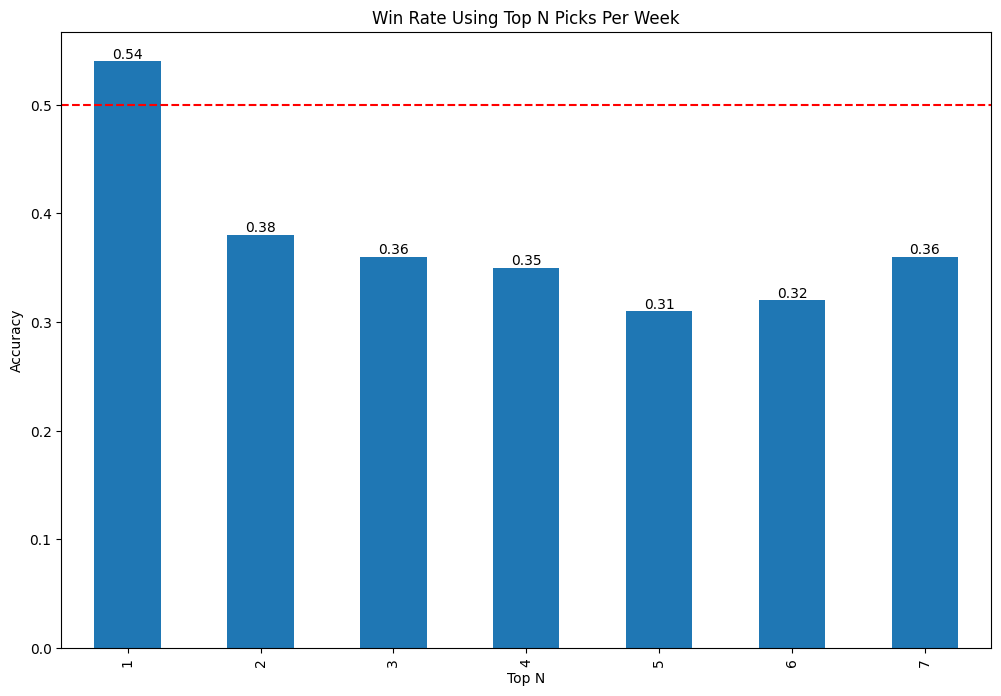

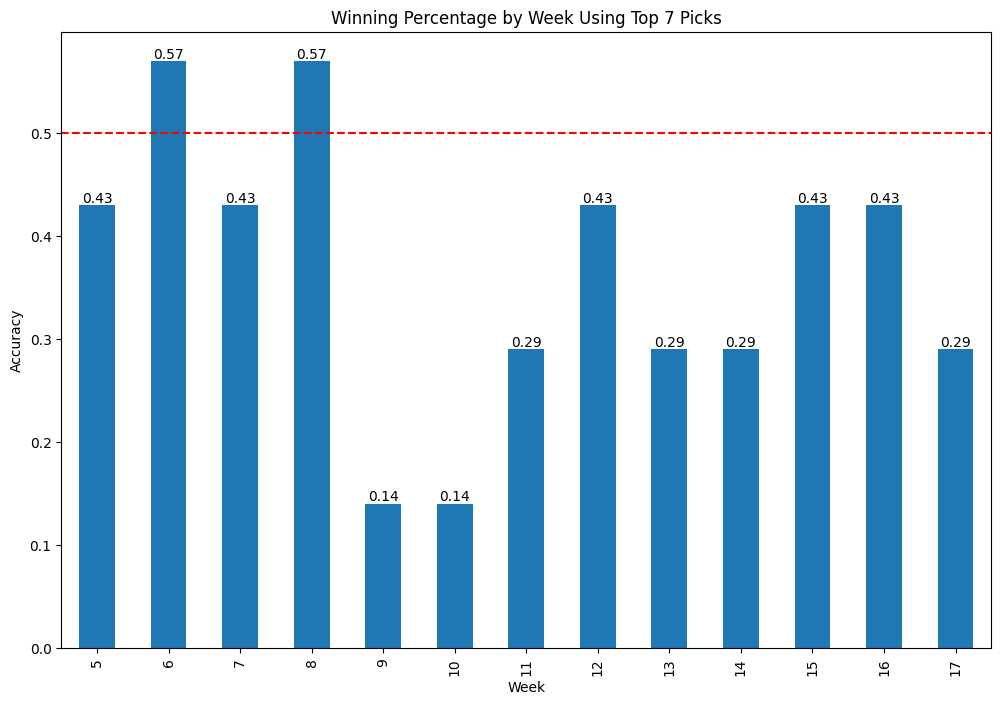

,importance,feature
15,0.079464,away_def_box_stuff_rate
1,0.070914,away_off_qb_comp
13,0.068076,away_conservative_coverage
5,0.065478,away_td_over_25_yd
0,0.065134,home_off_qb_comp
7,0.063380,away_off_avg_throw_dist
8,0.063365,home_def_qb_comp
12,0.063194,home_conservative_coverage
3,0.062456,away_points_per_epa
6,0.062208,home_off_avg_throw_dist


In [13]:
vars = select_variable_subset(FUNCTION_CATALOG=FUNCTION_CATALOG, total_variables=8) + ['team']
vars2 = [item for sublist in [[f'home_{v}',f'away_{v}'] for v in vars] for item in sublist]
vars2.extend(NUMERIC_META_COLS)

print('\n'.join(vars))

t2 = t[vars2]
m2 = Model(
    training_data = t2,
    params = {
            'objective':'binary:logistic',
            'gamma':0.4,
            'learning_rate':0.005,
            'max_depth':10,
            'n_estimators':100,
            'tree_method':'hist',
            'grow_policy': 'lossguide',
            'reg_alpha': 0.5,
            'reg_lambda': 0.5
        }
)
m2.get_test_accuracy_drop_off(top_N_range=range(1,8))
m2.get_test_accuracy_by_week(most_confident=7)
m2.assess_predictor_importance()

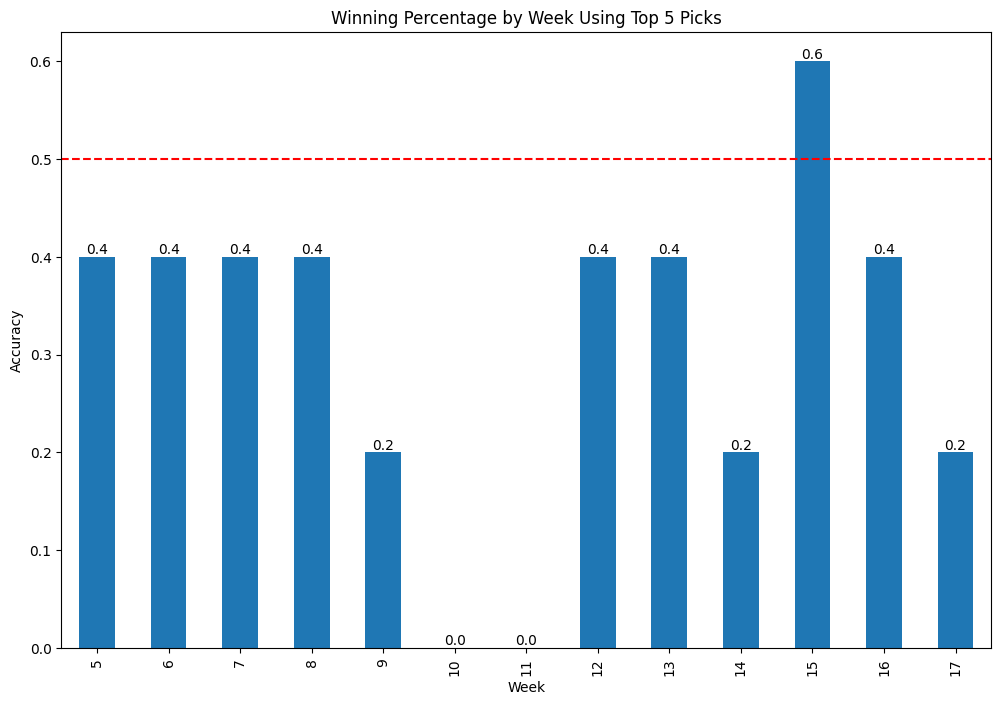

In [14]:
m2.get_test_accuracy_by_week(most_confident=5)

In [16]:
from models._utilities.model.sewer_builder import Sewer

Using cache


In [26]:
s = Sewer(
    FUNCTION_CATALOG=FUNCTION_CATALOG,
    batch_size=100
)
s.generate(verbose = True)

5
10
15
20
25
30
35
40
45
Failure generating model #45
Failure generating model #48
50
55
60
65
70
75
80
85
90
95
Failure generating model #97
100


In [27]:
crs = [x.comparison_row() for x in s.models]

In [48]:
left_scale_weight = 0.5

import pandas as pd
import numpy as np
res = pd.DataFrame(crs)
res['Value'] = res.apply(lambda x: np.dot(x,[(a + 1)**left_scale_weight for a in list(x.index)]), axis=1)
res.sort_values('Value',ascending=False)

,0,1,2,3,4,5,Value
67,0.77,0.73,0.69,0.62,0.62,0.58,7.044557
26,0.62,0.65,0.67,0.65,0.65,0.64,7.020830
78,0.54,0.65,0.64,0.65,0.69,0.64,6.978312
68,0.62,0.65,0.64,0.58,0.58,0.58,6.525375
42,0.54,0.65,0.64,0.60,0.57,0.53,6.340540
...,...,...,...,...,...,...,...
69,0.31,0.46,0.44,0.40,0.43,0.42,4.512936
95,0.46,0.38,0.36,0.42,0.40,0.44,4.433142
3,0.15,0.31,0.46,0.42,0.45,0.49,4.431630
9,0.31,0.38,0.41,0.40,0.42,0.41,4.300981


In [43]:
v = [1,2,3]
np.dot(v,v)

14